# <div class='alert alert-info'>Ad type predictions</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
from sklearn import preprocessing
import math
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import scipy
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
import warnings

warnings.filterwarnings('ignore')

In [190]:
df= pd.read_csv('/Users/rajathadri_as/Documents/CFS - website_ads_ad - 20231226.csv')

In [191]:
df.shape

(17816, 364)

In [192]:
df.head(3)

id  main_id  item_type_id guid  supertype_id   paa_step1  type_id  \
0   47589        0             0  NaN             0  type_id:1;        1   
1   47605        0             0  NaN             0  type_id:1;        1   
2  517756        0             0  NaN             0  type_id:1;        1   

          type_name  type_import  cat_id       cat_name  subcat_id  \
0  Touring Caravans            0      76  Conventionals          0   
1  Touring Caravans            0      76  Conventionals          0   
2  Touring Caravans            0      76  Conventionals          0   

   subcat_name  altcat_id  racegroup_id  racegroup_name  race_id  race_name  \
0          NaN          0             0             NaN        0        NaN   
1          NaN          0             0             NaN        0        NaN   
2          NaN          0             0             NaN        0        NaN   

   race_name_id  type_ad  active  auto_renew  ad_sold           ad_sold_on  \
0             0        0       1           0        0  0000-00-00 00:00:00   
1             0        0       1           0        0  0000-00-00 00:00:00   
2             0        0       1           0        0  0000-00-00 00:00:00   

   unclaimed  product  extra_fields  email_magazine     email_magazineon  \
0          0        0           NaN               0  0000-00-00 00:00:00   
1          0        0           NaN               0  0000-00-00 00:00:00   
2          0        0           NaN               0  0000-00-00 00:00:00   

   suspended          suspendedon  user_id       username  hp  \
0          0  0000-00-00 00:00:00   162317  johndoe177863   1   
1          0  0000-00-00 00:00:00   162317  johndoe177863   0   
2          0  0000-00-00 00:00:00   162317  johndoe177863   1   

           hp_start_on                                              title  \
0  2015-06-25 12:41:51  Bailey Unicorn Valencia 4 berth, (2012) Tourin...   
1  0000-00-00 00:00:00  Swift Challenger 565SE 4 berth, (2013) Touring...   
2  2015-08-14 07:50:27  Swift Charisma 550 4 berth, (2010) Touring Car...   

   country_id  fad_region_id fad_region_name  fad_county_id fad_county_name  \
0         219              0             NaN              0             NaN   
1         219              0             NaN              0             NaN   
2         219              0             NaN              0             NaN   

   fad_county_name_id  region_id region_name  region_sigla  county_id  \
0                   0          3       Wales           NaN        187   
1                   0          3       Wales           NaN        187   
2                   0          3       Wales           NaN        187   

     county_name  city_id postal_code             start_on  \
0  Pembrokeshire    38812     SA4 9RU  2015-06-25 12:41:51   
1  Pembrokeshire    38812     SA4 9RU  2015-06-26 06:22:52   
2  Pembrokeshire    38812         NaN  2015-08-14 07:50:27   

                end_on  never_expires  renew  renewed_from  renewed_to  \
0  2024-01-02 21:23:03              1      0             0           0   
1  2024-01-02 17:23:05              1      0             0           0   
2  2023-12-31 11:23:03              1      0             0           0   

   pre_moderate  post_moderate  yac_number  iovox_number  yac_number_active  \
0             0              1         NaN           NaN                  0   
1             0              1         NaN           NaN                  0   
2             0              1         NaN           NaN                  0   

         yac_number_on  approved approvedby           approvedon  \
0  0000-00-00 00:00:00         1        NaN  0000-00-00 00:00:00   
1  0000-00-00 00:00:00         1        NaN  0000-00-00 00:00:00   
2  0000-00-00 00:00:00         1        NaN  0000-00-00 00:00:00   

  reject_reason  user_active  almost_expired  almost_expired_date  days  \
0           NaN            1               0  0000-00-00 00:00:00    30   
1           NaN     

In [201]:
df['price'] = df['price']/100

In [202]:
df = df[['type_name','type_id','cat_name','cat_id','make_name','make_id','model_name','year','berth','newused','newused_id','length','price']]

In [203]:
df.head()

type_name  type_id       cat_name  cat_id make_name  make_id  \
0  Touring Caravans        1  Conventionals      76    Bailey      105   
1  Touring Caravans        1  Conventionals      76     Swift       84   
2  Touring Caravans        1  Conventionals      76     Swift       84   
3  Touring Caravans        1  Conventionals      76     Swift       84   
4  Touring Caravans        1  Conventionals      76    Bailey      105   

           model_name  year berth newused  newused_id length    price  
0    Unicorn Valencia  2012     4     NaN           0   5690  16995.0  
1    Challenger 565SE  2013     4     NaN           0    NaN  17785.0  
2        Charisma 550  2010     4     NaN           0    NaN  12495.0  
3       Conqueror 565  2012     4     NaN           0    NaN  16895.0  
4  Senator California  2009     4     NaN           0    NaN  12895.0

In [204]:
df.shape

(17816, 13)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17816 entries, 0 to 17815
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type_name   17816 non-null  object 
 1   type_id     17816 non-null  int64  
 2   cat_name    9840 non-null   object 
 3   cat_id      17816 non-null  int64  
 4   make_name   16879 non-null  object 
 5   make_id     17816 non-null  int64  
 6   model_name  16750 non-null  object 
 7   year        15746 non-null  object 
 8   berth       13476 non-null  object 
 9   newused     9426 non-null   object 
 10  newused_id  17816 non-null  int64  
 11  length      6348 non-null   object 
 12  price       17816 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.8+ MB


In [206]:
df['length'].nunique()

1582

In [132]:
df.isna().sum()

type_name        0
type_id          0
cat_name      7976
cat_id           0
make_name      937
make_id          0
model_name    1066
year          2070
berth         4340
newused       8390
newused_id       0
price            0
dtype: int64

In [133]:
# df['title'] = df['title'].fillna('Nil')
# df.dropna(inplace=True)

In [13]:
df.isna().sum()

type_name        0
type_id          0
cat_name      7976
cat_id           0
make_name      937
make_id          0
model_name    1066
year          2070
berth         4340
newused       8390
newused_id       0
price            0
dtype: int64

In [135]:
df.berth.value_counts()

berth
4            5545
2            2495
6            1376
4 berth      1044
3             761
6 berth       731
2 berth       544
5             364
> 7 berth     228
3 berth       129
5 berth       114
7              48
8              39
1              24
1 berth        18
7 berth        12
10              2
9               1
47              1
Name: count, dtype: int64

In [14]:
df.loc[df['berth'] == '1 berth', 'berth'] = '1'
df.loc[df['berth'] == '3 berth', 'berth'] = '3'
df.loc[df['berth'] == '2 berth', 'berth'] = '2'
df.loc[df['berth'] == '4 berth', 'berth'] = '4'
df.loc[df['berth'] == '6 berth', 'berth'] = '6'
df.loc[df['berth'] == '5 berth', 'berth'] = '5'
df.loc[df['berth'] == '7 berth', 'berth'] = '7'
df.loc[df['berth'] == '> 7 berth', 'berth'] = '8' 
df.loc[df['berth'] == '8', 'berth'] = '8' 
df.loc[df['berth'] == '9', 'berth'] = '8' 
df.loc[df['berth'] == '10', 'berth'] = '8' 
df.loc[df['berth'] == '47', 'berth'] = '8' 

In [15]:
df['berth'].value_counts().sort_index()

berth
1      42
2    3039
3     890
4    6589
5     478
6    2107
7      60
8     271
Name: count, dtype: int64

In [138]:
df['berth'].unique()

array(['4', '5', nan, '3', '2', '6', '8', '7', '1'], dtype=object)

In [16]:
df.dropna(subset = 'berth',inplace=True)

In [17]:
df.shape

(13476, 12)

In [18]:
df['berth'] = df['berth'].astype('int64')

In [142]:
df['berth'].value_counts().sort_index()

berth
1      42
2    3039
3     890
4    6589
5     478
6    2107
7      60
8     271
Name: count, dtype: int64

In [143]:
df['year'].value_counts()

year
2023.0       663
2023         643
2022.0       532
2021.0       509
2019.0       482
2018.0       465
2018         458
2021         434
2017         424
2016.0       424
2015.0       394
2017.0       392
2016         386
2020.0       360
2015         341
2022         331
2014.0       309
2019         302
2014         286
2020         258
2024.0       248
2013.0       239
2013         235
2011.0       218
2012         207
2012.0       205
2008         201
2011         198
2010         183
2010.0       173
s @ 10.4%    172
2007.0       167
2007         160
2008.0       145
2009.0       144
2009         139
2005         132
2024         132
2006         128
2006.0       125
2005.0       112
2004          93
2004.0        63
2003.0        55
2002          43
2003          41
2002.0        38
2001          31
2000.0        21
2000          19
2001.0        19
1999          18
1997          18
1995.0        15
1997.0        14
1996          13
1999.0        13
1998.0        11
1994     

In [19]:
df = df[~df['year'].isin(['2011 (61)', 'WA15 ATO','s @ 10.4%','2009 (09)','2007 (07)','2011 (11)','2008 (08)','2007 (57)','2004 (04)','2016 (16)','2014 (14)','FY22LCX','CU21AOC','2009 (58)','2007 (56)','2013 (13)','2012 (12)','2006 (56)','KE22HKD','RF57CXX','2006 (06)','VU22YXG','CV61 BZD','MF71RNN','YJ22EPP','CU58EHT','GU16HRF','CU22BNX','2010 (10)','CV23JVD','CU70EAC','NK16AXG','CU66AKG','2003 (53)','2008 (58)','JC12NET','YJ23CHG','YJ20BRV','YJ22 EPN','CN22EHE','2015 (15)','CU70EAG','BV16XRC','2014 (63)','2010 (60)','2019 (19)','2005 (05)','2014 (64)','2016 (66)','CU18BSV','CN09CLU','X8SDJ','CU14DWK','CU17AYJ','CU22BNZ','2011 (61)'])]

In [145]:
df['year'].value_counts()

year
2023.0    663
2023      643
2022.0    532
2021.0    509
2019.0    482
2018.0    465
2018      458
2021      434
2017      424
2016.0    424
2015.0    394
2017.0    392
2016      386
2020.0    360
2015      341
2022      331
2014.0    309
2019      302
2014      286
2020      258
2024.0    248
2013.0    239
2013      235
2011.0    218
2012      207
2012.0    205
2008      201
2011      198
2010      183
2010.0    173
2007.0    167
2007      160
2008.0    145
2009.0    144
2009      139
2024      132
2005      132
2006      128
2006.0    125
2005.0    112
2004       93
2004.0     63
2003.0     55
2002       43
2003       41
2002.0     38
2001       31
2000.0     21
2001.0     19
2000       19
1999       18
1997       18
1995.0     15
1997.0     14
1996       13
1999.0     13
1998.0     11
19.0       10
1994       10
1998        9
1995        8
1994.0      8
1992        7
1996.0      7
1990.0      7
1993.0      6
1973        6
1990        5
1973.0      5
1986        4
1986.0      4
1

In [20]:
df.isna().sum()

type_name        0
type_id          0
cat_name      6375
cat_id           0
make_name       32
make_id          0
model_name      62
year           586
berth            0
newused       6159
newused_id       0
price            0
dtype: int64

In [21]:
df.dropna(subset = 'year', inplace=True)

In [22]:
df['year'] = df['year'].astype('int64')
df['price'] = df['price'].astype('int64')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12650 entries, 0 to 17814
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type_name   12650 non-null  object
 1   type_id     12650 non-null  int64 
 2   cat_name    6695 non-null   object
 3   cat_id      12650 non-null  int64 
 4   make_name   12625 non-null  object
 5   make_id     12650 non-null  int64 
 6   model_name  12593 non-null  object
 7   year        12650 non-null  int64 
 8   berth       12650 non-null  int64 
 9   newused     6525 non-null   object
 10  newused_id  12650 non-null  int64 
 11  price       12650 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 1.3+ MB


In [157]:
df['newused'].value_counts().sort_index()

newused
Brand new                           1479
Used - Average condition for age     255
Used - Good condition               4701
Used - Poor condition                107
Used - Spare parts or repair           4
Name: count, dtype: int64

In [24]:
df.loc[df['newused_id'] == 1, 'newused'] = 'Brand new'
df.loc[df['newused_id'] == 2, 'newused'] = 'Used - Good condition'
df.loc[df['newused_id'] == 3, 'newused'] = 'Used - Average condition for age'

In [25]:
df.loc[df['newused'] == 'Average', 'newused'] = 'Used - Average condition for age'
df.loc[df['newused'] == 'Excellent', 'newused'] = 'Brand new'
df.loc[df['newused'] == 'Good', 'newused'] = 'Used - Good condition'
df.loc[df['newused'] == 'N', 'newused'] = 'Brand new'
df.loc[df['newused'] == 'New', 'newused'] = 'Brand new'
df.loc[df['newused'] == 'Y', 'newused'] = 'Brand new'
df.loc[df['newused'] == 'Used', 'newused'] = 'Used - Good condition'
df.loc[df['newused'] == 'Pre-owned', 'newused'] = 'Used - Good condition'
df.loc[df['newused'] == 'Pre-loved', 'newused'] = 'Used - Poor condition'
df.loc[df['newused'] == 'used', 'newused'] = 'Used - Good condition'

In [26]:
df.loc[df['newused'] == 'Brand new', 'newused'] = 1
df.loc[df['newused'] == 'Used - Average condition for age', 'newused'] = 2
df.loc[df['newused'] == 'Used - Good condition', 'newused'] = 3
df.loc[df['newused'] == 'Used - Poor condition', 'newused'] = 4
df.loc[df['newused'] == 'Used - Spare parts or repair', 'newused'] = 5

In [27]:
df['newused'].unique()

array([nan, 3, 1, 2, 4, 5], dtype=object)

In [160]:
df['newused'].value_counts().sort_index()

newused
1    1479
2     255
3    4701
4     107
5       4
Name: count, dtype: int64

In [28]:
df.isnull().sum()

type_name        0
type_id          0
cat_name      5955
cat_id           0
make_name       25
make_id          0
model_name      57
year             0
berth            0
newused       6104
newused_id       0
price            0
dtype: int64

In [163]:
df.shape

(12650, 12)

In [29]:
df['newused'].value_counts()

newused
3    4701
1    1479
2     255
4     107
5       4
Name: count, dtype: int64

In [60]:
df[df['year']==2022].shape

(863, 14)

In [86]:
df['condition'] = pd.cut(df['year'], bins=[-float('inf'), 2000, 2005, 2009, 2021, float('inf')], labels=['repair','poor', 'average', 'good', 'new'])

In [57]:
df['entry']=1

In [80]:
df.head()

type_name  type_id       cat_name  cat_id make_name  make_id  \
0  Touring Caravans        1  Conventionals      76    Bailey      105   
1  Touring Caravans        1  Conventionals      76     Swift       84   
2  Touring Caravans        1  Conventionals      76     Swift       84   
3  Touring Caravans        1  Conventionals      76     Swift       84   
4  Touring Caravans        1  Conventionals      76    Bailey      105   

           model_name  year  berth newused  newused_id  price condition  entry  
0    Unicorn Valencia  2012      4     NaN           0  16995      good      1  
1    Challenger 565SE  2013      4     NaN           0  17785      good      1  
2        Charisma 550  2010      4     NaN           0  12495   average      1  
3       Conqueror 565  2012      4     NaN           0  16895      good      1  
4  Senator California  2009      4     NaN           0  12895   average      1

In [87]:
pd.pivot_table(df, values = 'entry', index = 'newused',columns ='condition', aggfunc=np.sum)

condition  repair  poor  average  good   new
newused                                     
1              21    10       23   283  1142
2              19    35       49   147     5
3              90   231      410  3503   467
4               2     2        8    73    22
5               2     0        1     1     0

In [90]:
def map_newused(row):
    year = row['year']
    newused = row['newused']
    
    # Applying the mapping only when 'newused' is null
    if pd.isnull(newused):
        if pd.notnull(year):
            if year > 2021:
                return 1
            elif 2009 < year <= 2021:
                return 3
            elif 2005 < year <= 2009:
                return 2
            elif 2000 < year <= 2005:
                return 4
            elif year <= 2000:
                return 5

    return newused

# Applying the function to create/modify the 'newused' column
df['newused'] = df.apply(map_newused, axis=1)

In [88]:
df.isnull().sum()

type_name        0
type_id          0
cat_name      5955
cat_id           0
make_name       25
make_id          0
model_name      57
year             0
berth            0
newused       6104
newused_id       0
price            0
condition        0
entry            0
dtype: int64

In [91]:
df.isnull().sum()

type_name        0
type_id          0
cat_name      5955
cat_id           0
make_name       25
make_id          0
model_name      57
year             0
berth            0
newused          0
newused_id       0
price            0
condition        0
entry            0
dtype: int64

In [89]:
df['newused'].value_counts()

newused
3    4701
1    1479
2     255
4     107
5       4
Name: count, dtype: int64

In [92]:
df['newused'].value_counts()

newused
3    8576
1    2449
2     973
4     456
5     196
Name: count, dtype: int64

In [93]:
# df.dropna(subset = 'newused', inplace=True)

In [94]:
df['newused'] = df['newused'].astype('int64')

In [95]:
df.shape

(12650, 14)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12650 entries, 0 to 17814
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   type_name   12650 non-null  object  
 1   type_id     12650 non-null  int64   
 2   cat_name    6695 non-null   object  
 3   cat_id      12650 non-null  int64   
 4   make_name   12625 non-null  object  
 5   make_id     12650 non-null  int64   
 6   model_name  12593 non-null  object  
 7   year        12650 non-null  int64   
 8   berth       12650 non-null  int64   
 9   newused     12650 non-null  int64   
 10  newused_id  12650 non-null  int64   
 11  price       12650 non-null  int64   
 12  condition   12650 non-null  category
 13  entry       12650 non-null  int64   
dtypes: category(1), int64(9), object(4)
memory usage: 1.9+ MB


In [97]:
df.dropna(subset = 'model_name', inplace=True)
df.dropna(subset = 'make_name', inplace=True)

In [98]:
df.shape

(12592, 14)

In [99]:
df = df[['type_name','make_name','model_name','year','berth','newused','price']]

In [135]:
df['type_name'].value_counts()

type_name
1    3682
3    3378
2    3144
4    1224
5     584
6     115
7      13
Name: count, dtype: int64

In [134]:
df.loc[df['type_name'] == 'Touring Caravans', 'type_name'] = 1 
df.loc[df['type_name'] == 'Motorhomes', 'type_name'] = 2
df.loc[df['type_name'] == 'For Hire', 'type_name'] = 3
df.loc[df['type_name'] == 'Static Caravans', 'type_name'] = 4
df.loc[df['type_name'] == 'Campervans', 'type_name'] = 5
df.loc[df['type_name'] == 'Towing Vehicles', 'type_name'] = 6
df.loc[df['type_name'] == 'Lodge', 'type_name'] = 7

In [137]:
df['type_name'] = df['type_name'].astype('int64')

In [ ]:
# Handling null values in Type_name
# df.loc[df['type_id'] == 4, 'type_name'] = 'Services'
# df.loc[df['type_id'] == 9, 'type_name'] = 'Adult Businesses'

In [ ]:
# Handling null values in Cat_name
# df.loc[df['cat_id'] == 190, 'cat_name'] = 'Business & Office'
# df.loc[df['cat_id'] == 191, 'cat_name'] = 'Professional Services'
# df.loc[df['cat_id'] == 192, 'cat_name'] = 'Events & Celebrations'
# df.loc[df['cat_id'] == 193, 'cat_name'] = 'Family & Care Services'
# df.loc[df['cat_id'] == 194, 'cat_name'] = 'Health, Beauty & Wellness'
# df.loc[df['cat_id'] == 195, 'cat_name'] = 'Fitness'
# df.loc[df['cat_id'] == 196, 'cat_name'] = 'Lessons & Tuition'
# df.loc[df['cat_id'] == 197, 'cat_name'] = 'Home & Garden'
# df.loc[df['cat_id'] == 198, 'cat_name'] = 'Pets & Horses'
# df.loc[df['cat_id'] == 199, 'cat_name'] = 'Motoring & Transport'
# df.loc[df['cat_id'] == 201, 'cat_name'] = 'Local Food & Drink'
# df.loc[df['cat_id'] == 202, 'cat_name'] = 'Retail'
# df.loc[df['cat_id'] == 263, 'cat_name'] = 'Escort Agencies'

In [ ]:
# df['type_name'].value_counts()

In [ ]:
# df = df[df['cat_id']!=0]

In [ ]:
# df = df[df['type_id']!=0]

In [ ]:
# df = df[df['type_name'] != 'Services']

In [ ]:
# df.dropna(inplace=True)

In [ ]:
# df.isna().sum()

In [ ]:
# df.shape

In [ ]:
# df['type_name'].value_counts()

In [ ]:
# df.head()

In [ ]:
# df['type_name'].value_counts(normalize = True).plot.bar()

In [ ]:
# df['cat_name'].value_counts(normalize = True).plot.bar()

In [138]:
df.describe().T

count          mean           std     min     25%      50%  \
type_name  12140.0      2.364168      1.209806     1.0     1.0      2.0   
year       12140.0   2015.273229      7.151156  1907.0  2012.0   2017.0   
berth      12140.0      3.946623      1.435702     1.0     3.0      4.0   
newused    12140.0      2.657249      0.851955     1.0     3.0      3.0   
price      12140.0  26223.299835  30981.631576     0.0   127.0  17500.0   

               75%       max  
type_name      3.0       7.0  
year        2021.0    2023.0  
berth          4.0       8.0  
newused        3.0       5.0  
price      42995.0  389995.0

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12592 entries, 0 to 17814
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type_name   12592 non-null  object
 1   make_name   12592 non-null  object
 2   model_name  12592 non-null  object
 3   year        12592 non-null  int64 
 4   berth       12592 non-null  int64 
 5   newused     12592 non-null  int64 
 6   price       12592 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 787.0+ KB


# <div class = 'alert alert-info'>NLTK text processing</div>

In [26]:
# import nltk
# nltk.download('all')

[nltk_data] Error loading all: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


False

In [27]:
# # create a list text
# text = list(df['title'])

In [28]:
# preprocessing loop
# import re
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()

In [29]:
# corpus = []

# for i in range(len(text)):
#     r = re.sub('[^a-zA-Z]', ' ', text[i])
#     r = r.lower()
#     r = r.split()
#     r = [word for word in r if word not in stopwords.words('english')]
#     r = [lemmatizer.lemmatize(word) for word in r]
#     r = ' '.join(r)
#     corpus.append(r)

In [30]:
# corpus

['bailey unicorn valencia berth touring caravan sale',
 'swift challenger se berth touring caravan sale',
 'swift charisma berth touring caravan sale',
 'swift conqueror berth touring caravan sale',
 'bailey senator california berth touring caravan sale',
 'elddis odyssey berth touring caravan sale',
 'swift challenger berth touring caravan sale',
 'bailey olympus berth touring caravan sale',
 'swift challenger sport berth touring caravan sale',
 'nil',
 'avondale avocet berth touring caravan sale',
 'bessacarr cameo berth touring caravan sale',
 'ace firestar berth touring caravan sale',
 'lunar stellar touring caravan sale',
 'bailey senator series indiana berth touring caravan sale',
 'fleetwood colchester berth touring caravan sale',
 'nil',
 'compass rallye berth touring caravan sale',
 'coachman vision berth touring caravan sale',
 'sterling europa berth touring caravan sale',
 'compass rallye berth touring caravan sale',
 'swift challenger sr berth touring caravan sale',
 'swift

In [31]:
# #assign corpus to df
# df['title'] = corpus
# df.head()

title make_name  \
0  bailey unicorn valencia berth touring caravan ...    Bailey   
1     swift challenger se berth touring caravan sale     Swift   
2          swift charisma berth touring caravan sale     Swift   
3         swift conqueror berth touring caravan sale     Swift   
4  bailey senator california berth touring carava...    Bailey   

           model_name  year  berth newused  price  
0    Unicorn Valencia  2012      4     Nil  16995  
1    Challenger 565SE  2013      4     Nil  17785  
2        Charisma 550  2010      4     Nil  12495  
3       Conqueror 565  2012      4     Nil  16895  
4  Senator California  2009      4     Nil  12895

In [32]:
# def lemmatize_words(text):
#     words = text.split()
#     words = [lemmatizer.lemmatize(word,pos='v') for word in words]
#     return ' '.join(words)

In [33]:
# df['title'] = df['title'].apply(lemmatize_words)

In [34]:
# df.head()

title make_name  \
0    bailey unicorn valencia berth tour caravan sale    Bailey   
1        swift challenger se berth tour caravan sale     Swift   
2             swift charisma berth tour caravan sale     Swift   
3            swift conqueror berth tour caravan sale     Swift   
4  bailey senator california berth tour caravan sale    Bailey   

           model_name  year  berth newused  price  
0    Unicorn Valencia  2012      4     Nil  16995  
1    Challenger 565SE  2013      4     Nil  17785  
2        Charisma 550  2010      4     Nil  12495  
3       Conqueror 565  2012      4     Nil  16895  
4  Senator California  2009      4     Nil  12895

In [35]:
# # import these modules
# from nltk.stem import PorterStemmer
# from nltk.tokenize import word_tokenize

# ps = PorterStemmer()

In [36]:
# df['title'] = df['title'].apply(ps.stem)

In [37]:
# df = df[['make_name','model_name','year','berth','newused','price']]

In [38]:
# df.head()

make_name          model_name  year  berth newused  price
0    Bailey    Unicorn Valencia  2012      4     Nil  16995
1     Swift    Challenger 565SE  2013      4     Nil  17785
2     Swift        Charisma 550  2010      4     Nil  12495
3     Swift       Conqueror 565  2012      4     Nil  16895
4    Bailey  Senator California  2009      4     Nil  12895

# <div class = 'alert alert-info'>Feature Engineering</div>

### Null Check

In [103]:
df.isnull().sum()

type_name     0
make_name     0
model_name    0
year          0
berth         0
newused       0
price         0
dtype: int64

### Outliers

In [104]:
df.describe()

year         berth       newused         price
count  12592.000000  12592.000000  12592.000000  1.259200e+04
mean    2014.006750      3.937421      2.602843  2.854281e+04
std       61.199605      1.428482      0.888459  5.986600e+04
min        0.000000      1.000000      1.000000  0.000000e+00
25%     2012.000000      3.000000      2.000000  1.330000e+02
50%     2017.000000      4.000000      3.000000  1.850000e+04
75%     2021.000000      4.000000      3.000000  4.555875e+04
max     3221.000000      8.000000      5.000000  4.500000e+06

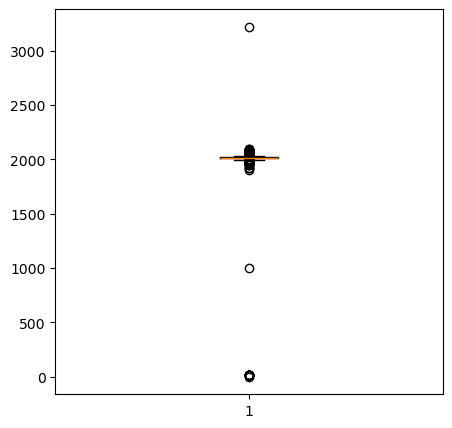

In [105]:
fig = plt.figure(figsize =(5, 5))

plt.boxplot(df['year'])
plt.show()

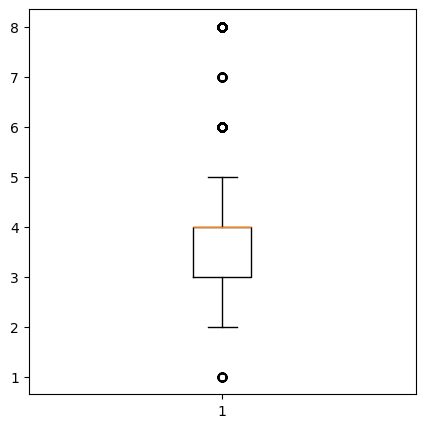

In [106]:
fig = plt.figure(figsize =(5, 5))

plt.boxplot(df['berth'])
plt.show()

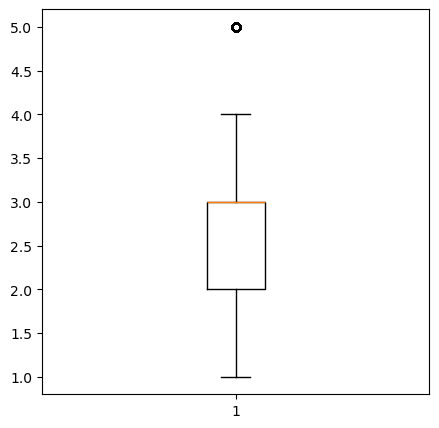

In [108]:
fig = plt.figure(figsize =(5, 5))

plt.boxplot(df['newused'])
plt.show()

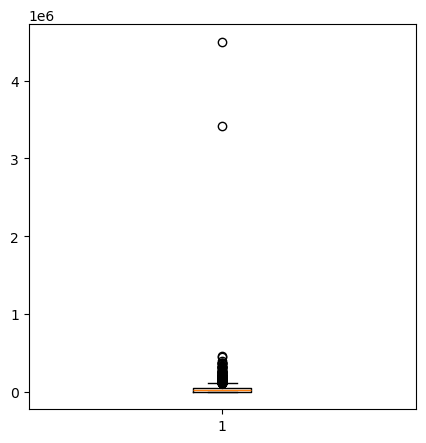

In [107]:
fig = plt.figure(figsize =(5, 5))

plt.boxplot(df['price'])
plt.show()

In [109]:
df = df[df['year'] <= 2023]
df= df[df['year'] >= 1500]

In [110]:
df = df[df['berth'] <= 8]

In [118]:
df = df[df['price'] <= 400000]

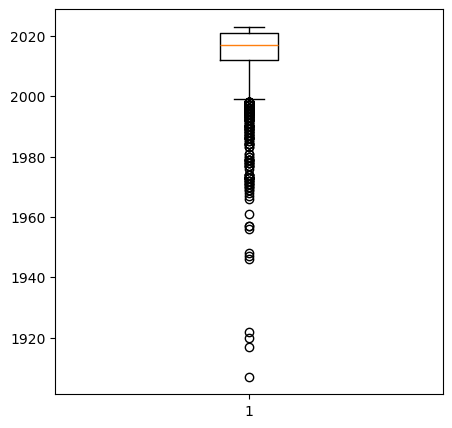

In [112]:
fig = plt.figure(figsize =(5, 5))

plt.boxplot(df['year'])
plt.show()

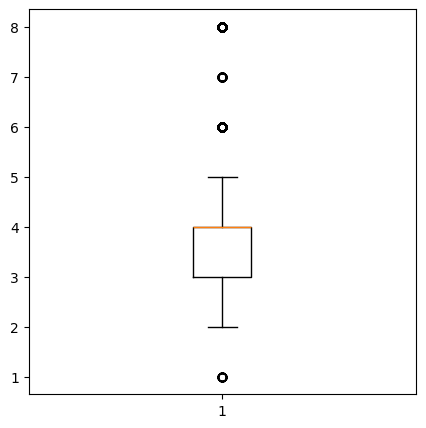

In [113]:
fig = plt.figure(figsize =(5, 5))

plt.boxplot(df['berth'])
plt.show()

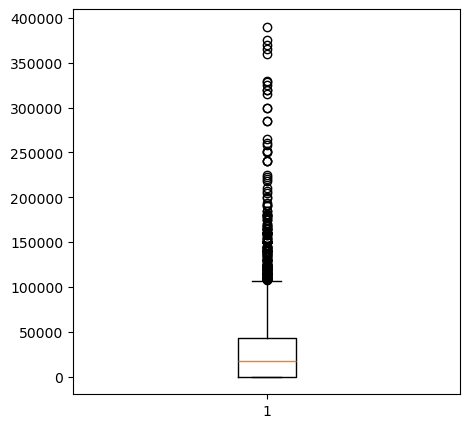

In [119]:
fig = plt.figure(figsize =(5, 5))

plt.boxplot(df['price'])
plt.show()

In [139]:
df.describe().T

count          mean           std     min     25%      50%  \
type_name  12140.0      2.364168      1.209806     1.0     1.0      2.0   
year       12140.0   2015.273229      7.151156  1907.0  2012.0   2017.0   
berth      12140.0      3.946623      1.435702     1.0     3.0      4.0   
newused    12140.0      2.657249      0.851955     1.0     3.0      3.0   
price      12140.0  26223.299835  30981.631576     0.0   127.0  17500.0   

               75%       max  
type_name      3.0       7.0  
year        2021.0    2023.0  
berth          4.0       8.0  
newused        3.0       5.0  
price      42995.0  389995.0

In [140]:
df.shape

(12140, 7)

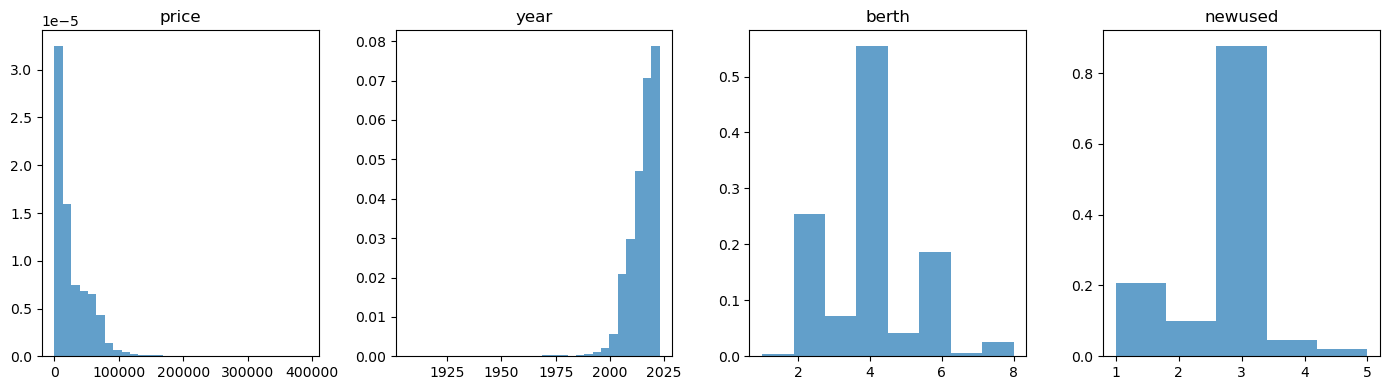

In [141]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(14, 4))
axs[0].hist(df['price'], bins=30, density=True, alpha=0.7)
axs[0].set_title("price")
axs[1].hist(df['year'], bins=30, density=True, alpha=0.7)
axs[1].set_title("year")
axs[2].hist(df['berth'], bins=8, density=True, alpha=0.7)
axs[2].set_title("berth")
axs[3].hist(df['newused'], bins=5, density=True, alpha=0.7)
axs[3].set_title("newused")
plt.tight_layout()
plt.show()

In [ ]:
Break Auto Execution

# <div class = 'alert alert-info'>Modeling - Ad Type</div>

In [51]:
# categorical_features = ['newused','model_name','make_name'] 

In [52]:
# encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')
# one_hot_features = encoder.fit_transform(df[categorical_features])
# one_hot_names = encoder.get_feature_names_out()

In [53]:
# one_hot_df = pd.DataFrame.sparse.from_spmatrix(one_hot_features)
# one_hot_df.columns = one_hot_names 
# one_hot_df.head()

newused_Average  newused_Brand new  newused_Excellent  newused_Good  \
0              0.0                0.0                0.0           0.0   
1              0.0                0.0                0.0           0.0   
2              0.0                0.0                0.0           0.0   
3              0.0                0.0                0.0           0.0   
4              0.0                0.0                0.0           0.0   

   newused_N  newused_New  newused_Nil  newused_Pre-loved  newused_Pre-owned  \
0        0.0          0.0          1.0                0.0                0.0   
1        0.0          0.0          1.0                0.0                0.0   
2        0.0          0.0          1.0                0.0                0.0   
3        0.0          0.0          1.0                0.0                0.0   
4        0.0          0.0          1.0                0.0                0.0   

   newused_Used  newused_Used - Average condition for age  \
0           0.0                                       0.0   
1           0.0                                       0.0   
2           0.0                                       0.0   
3           0.0                                       0.0   
4           0.0                                       0.0   

   newused_Used - Good condition  newused_Used - Poor condition  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   

   newused_Used - Spare parts or repair  newused_Y  newused_used  \
0                                   0.0        0.0           0.0   
1                                   0.0        0.0           0.0   
2                                   0.0        0.0           0.0   
3                                   0.0        0.0           0.0   
4                                   0.0        0.0           0.0   

   model_name_#Lucky - cosy wood burner camper  model_name_#dany.thevito  \
0                                          0.0                       0.0   
1                                          0.0                       0.0   
2                                          0.0                       0.0   
3                                          0.0                       0.0   
4                                          0.0                       0.0   

   model_name_(FIAT)  \
0                0.0   
1                0.0   
2                0.0   
3                0.0   
4                0.0   

   model_name_(MH001) Lovely 2020 4 berth Automatic Motorhome with Island bed  \
0                                                0.0                            
1                                                0.0                            
2                                                0.0                            
3                                                0.0                            
4                                                0.0                            

   model_name_(MH002) Lovely 6 berth Swift  Edge 476 Motorhome  \
0                                                0.0             
1                                                0.0             
2                                                0.0             
3                                                0.0             
4                                                0.0             

   model_name_(MH003) 2023 4 berth Bailey Adamo 754 DL  \
0                                                0.0     
1                                                0.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   model_name_(VW001) 2021 VW T6 Bilbo\'s Camper van with heati

Text(0.5, 1.0, 'Distribution of prices')

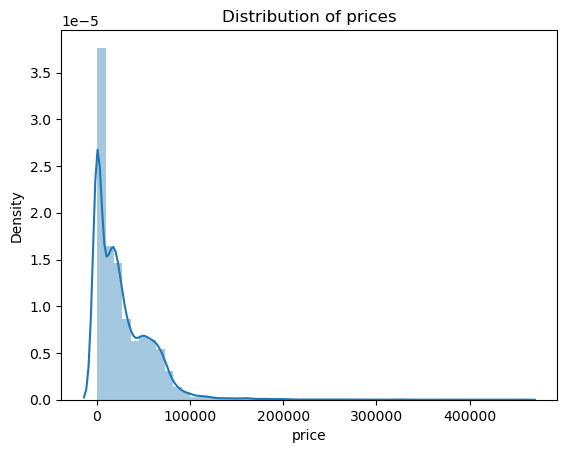

In [54]:
# sns.distplot(df['price']).set_title("Distribution of prices")

In [55]:
# min_max_scaler = preprocessing.MinMaxScaler()

# numerical_features = ['year','berth']

Text(0.5, 1.0, 'Box plots for min-max scaled features')

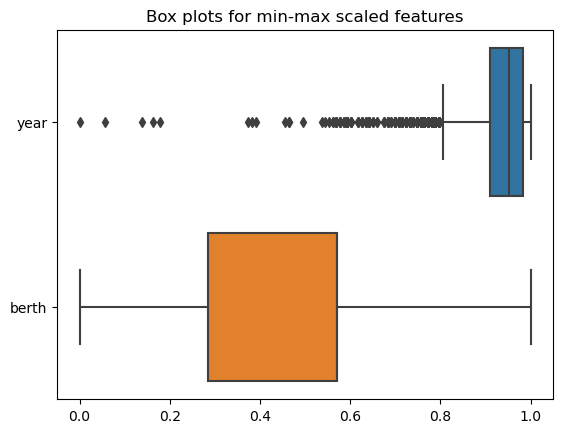

In [56]:
# dataScaled = pd.DataFrame(min_max_scaler.fit_transform(df[numerical_features]), columns=numerical_features)
# ax = sns.boxplot(data=dataScaled, orient="h")
# ax.set_title("Box plots for min-max scaled features")

In [57]:
# transform_cols = ['year','berth']
# for col in transform_cols:
#     col_log1p = col + '_log1p'
#     df[col_log1p] = df[col].apply(math.log1p)

In [58]:
# numerical_features_log1p = numerical_features
# min_max_scaler = preprocessing.MinMaxScaler()

In [59]:
# def take_log_col(col):
#     if col in transform_cols: return col + '_log1p'
#     else: return col

In [60]:
# numerical_features_log1p[:] = [take_log_col(col) for col in numerical_features_log1p]

Text(0.5, 1.0, 'Box plots for min-max scaled features')

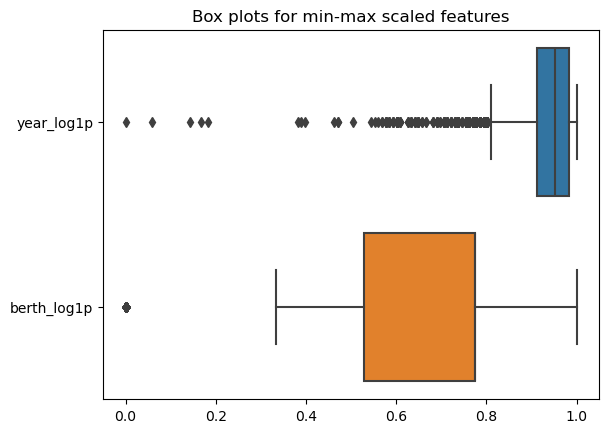

In [61]:
# dataScaled_log1p = pd.DataFrame(min_max_scaler.fit_transform(df[numerical_features_log1p]), columns=numerical_features_log1p)
# ax = sns.boxplot(data=dataScaled_log1p, orient="h")
# ax.set_title("Box plots for min-max scaled features")

In [62]:
# numerical_feature_names = ['year_log1p','berth_log1p']

In [63]:
# numerical_feature = df[numerical_feature_names]

In [64]:
# scaler = preprocessing.MinMaxScaler()
# numerical_features = scaler.fit_transform(numerical_feature)

In [65]:
# features = scipy.sparse.hstack((numerical_features, one_hot_features)) 
# all_feature_names = np.hstack((numerical_feature_names,one_hot_names))

In [66]:
# target = df['price'].values

In [142]:
df.head()

type_name make_name          model_name  year  berth  newused  price
0          1    Bailey    Unicorn Valencia  2012      4        3  16995
1          1     Swift    Challenger 565SE  2013      4        3  17785
2          1     Swift        Charisma 550  2010      4        3  12495
3          1     Swift       Conqueror 565  2012      4        3  16895
4          1    Bailey  Senator California  2009      4        2  12895

In [143]:
df['make_name'].nunique()

259

In [144]:
df['model_name'].nunique()

8105

In [153]:
df.drop(['make_name','model_name'], axis = 1, inplace = True)

In [154]:
X = df.drop(['price'], axis = 1)

In [155]:
y = df['price']

In [156]:
rand_seed = 42 
features_train, features_test, target_train, target_test = train_test_split(X, y, test_size=0.2, random_state=rand_seed)

In [157]:
features_train.shape

(9712, 4)

In [158]:
target_train.shape

(9712,)

In [159]:
features_test.shape

(2428, 4)

In [160]:
target_test.shape

(2428,)

In [ ]:
Break Auto Execution # Self-induced error

---

# <div class = 'alert alert-warning'> Linear Regression</div>

In [161]:
reg=LinearRegression()
reg.fit(features_train,target_train)

LinearRegression()

In [162]:
pred_train =reg.predict(features_train)

In [163]:
pred_train

array([24391.75361253, 24431.27722405, 46667.44319065, ...,
        8339.53644144, 24431.27722405, 24205.06880408])

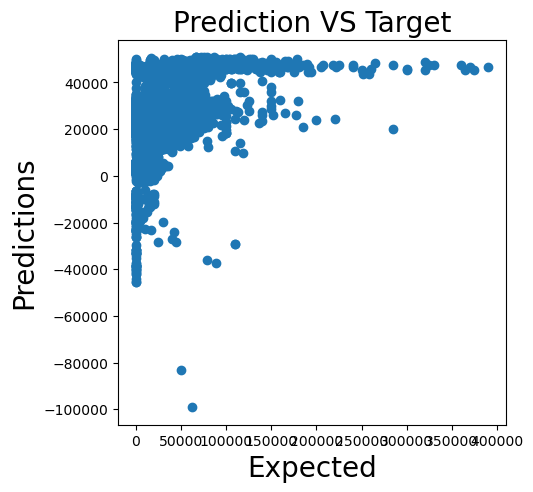

In [165]:
plt.figure(figsize=(5,5))
plt.scatter(target_train,pred_train)
plt.xlabel('Expected',fontsize=20)
plt.ylabel('Predictions',fontsize=20)
plt.title('Prediction VS Target',fontsize=20)
plt.show()

In [166]:
reg.score(features_train,target_train)

0.15146600530314802

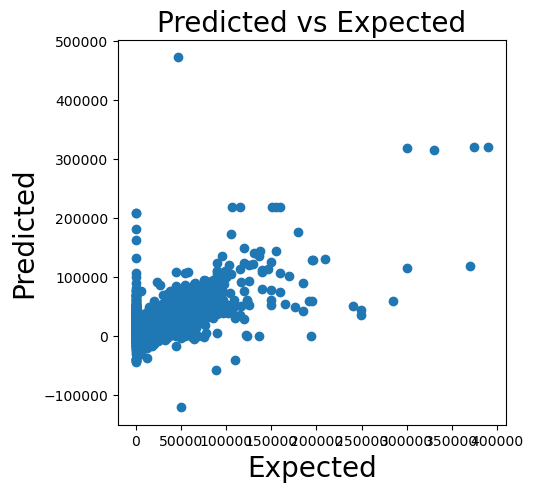

In [78]:
pred_test =reg.predict(features_test)
plt.figure(figsize=(5,5))
plt.scatter(target_test,pred_test,)
plt.xlabel('Expected',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Predicted vs Expected',fontsize=20)
plt.show()

In [79]:
reg.score(features_test,target_test)

0.3424133880812755

In [80]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer(min_df=3)),
                          ('lr_multi',MultiOutputClassifier(
                              GridSearchCV(Ridge(), {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}, cv=5)
                              ))]
                  )

In [81]:
pipe_lr.fit(features_train, target_train)

AttributeError: 'csr_matrix' object has no attribute 'lower'

In [84]:
pipe_lr.score(features_train, target_train)

NotFittedError: Vocabulary not fitted or provided

In [ ]:
pipe_lr.score(X_test,y_test)

# <div class = 'alert alert-success'>CV for Logistic Regression</div>

In [ ]:
lr = LogisticRegression()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 200]}
grid = GridSearchCV(lr, param_grid, cv=3)
grid.fit(X_train_cv, y_train)


# Recheck the best cross-validation sccore

print("Best cross-validation score:", grid.best_score_)
print("Best parameters:", grid.best_params_)
print("Test set score:", grid.score(X_test_cv, y_test))

In [ ]:
y_pred_test = grid.predict(X_test_cv)

In [ ]:
y_pred_train = grid.predict(X_train_cv)

In [ ]:
print(classification_report(y_train, y_pred_train))

In [ ]:
print("Classification report for test data: \n")
print(classification_report(y_test, y_pred_test))

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

# <div class = 'alert alert-warning'>Random Forest Classifer</div>

In [ ]:
clsr = RandomForestClassifier(n_estimators=100)
clsr.fit(X_train_cv, y_train)

In [ ]:
y_pred_train = clsr.predict(X_train_cv)
train_score = accuracy_score(y_train, y_pred_train)
train_score

In [ ]:
# Predictions
y_pred_test = clsr.predict(X_test_cv)
test_score= accuracy_score(y_test, y_pred_test)
test_score

In [ ]:
# Classification Report
print('Classification report for Random Forest (Train set) = \n')
print(classification_report(y_pred_train, y_train))

In [ ]:
# Classification Report
print('Classification report for Random Forest (Test set)= \n')
print(classification_report(y_pred_test, y_test))

# <div class = 'alert alert-warning'>CV for Random Forest</div>

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 400, num = 10)]

# Number of features to consider at every split
max_features = ['sqrt','log2']

# Maximum number of levels in tree
max_depth = [2,4]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

In [ ]:
rf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_RandomGrid = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, scoring='f1', cv = 10, verbose=2, n_jobs = 4)

In [ ]:
rf_RandomGrid.fit(X_train_cv, y_train)

In [ ]:
rf_RandomGrid.best_params_

In [ ]:
confusion_matrix(y_test, y_pred_test)

In [ ]:
print(classification_report(y_test, y_pred_test))

In [ ]:
# params = {'n_estimators':[200],
#           'max_features':['sqrt',4,'log2','auto'],
#           'max_leaf_nodes':[10, 20, 40]
#           }

# # Apply random Forest Classifier Model

# rf_cv = GridSearchCV(rf, params, scoring='f1', cv=5)
# rf_cv.fit(X_train_cv, y_train)

In [ ]:
# rf_cv.best_params_

In [ ]:
# rf_cv.best_estimator_

In [ ]:
# rf_cv.best_score_

In [ ]:
# rf_cv = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                        criterion='gini', max_depth=40, max_features='sqrt',
#                        max_leaf_nodes=40, max_samples=None,
#                        min_impurity_decrease=0.0,
#                        min_samples_leaf=1, min_samples_split=2,
#                        min_weight_fraction_leaf=0.0, n_estimators=200,
#                        n_jobs=None, oob_score=False, random_state=None,
#                        verbose=0, warm_start=False)
# rf_cv.fit(X_train_cv, y_train)

In [ ]:
# y_pred_train = rf_cv.predict(X_train_cv)
# accuracy_score(y_train, y_pred_train)

In [ ]:
# y_pred_test = rf_cv.predict(X_test_cv)
# accuracy_score(y_test, y_pred_test)

# <div class = 'alert alert-warning'>XGBoost Classifier</div>

In [ ]:
# Already installed

# pip install xgboost

In [ ]:
df2 = df.copy()

In [ ]:
df2.loc[df['type_id'] == 1, 'type_id'] = 0
df2.loc[df['type_id'] == 2, 'type_id'] = 1
df2.loc[df['type_id'] == 3, 'type_id'] = 2
df2.loc[df['type_id'] == 5, 'type_id'] = 3
df2.loc[df['type_id'] == 6, 'type_id'] = 4
df2.loc[df['type_id'] == 7, 'type_id'] = 5
df2.loc[df['type_id'] == 8, 'type_id'] = 6
df2.loc[df['type_id'] == 9, 'type_id'] = 7

In [ ]:
df2[['type_id','type_name']].value_counts()

In [ ]:
X = df2['title']
y = df2[['type_id']]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

In [ ]:
# transform X_test using CV
X_test_cv = cv.transform(X_test)

X_test_cv.shape

In [ ]:
xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train_cv, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')

In [ ]:
# Predictions
y_pred_train = xgb.predict(X_train_cv)
y_pred_test = xgb.predict(X_test_cv)

In [ ]:
score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= \n')
print(score)

In [ ]:
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Train set)= \n')
print(score)

# <div class = 'alert alert-success'>Pickle and Predict</div>

In [ ]:
pipe_lr = Pipeline(steps=[('cv',TfidfVectorizer(analyzer='word',stop_words= 'english')),
                          ('lr_multi',MultiOutputClassifier(
                              GridSearchCV(LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1, 10, 100, 200]}, cv=5)
                              ))]
                  )

In [ ]:
pipe_lr.fit(X_train, y_train)

In [ ]:
pipe_lr.score(X_train,y_train)

In [ ]:
pipe_lr.score(X_test,y_test)

In [ ]:
# Save the model to a file using pickle
filename = 'FAD_MLclassifier_AdType.pkl'
with open(filename, 'wb') as file:
    pickle.dump(pipe_lr, file)

In [ ]:
file.close()

In [ ]:
# Let's Predict

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pickle

In [ ]:
with open('FAD_AdTypeClassifier_model.pkl', 'rb') as file:
    mod = pickle.load(file)

# Load some new data for prediction
X_new = ["Hiring for Services"]

In [ ]:
mod.predict(X_new)

In [ ]:
file.close()

In [ ]:
# tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

# X_train_new = tfidfvectorizer.fit_transform(X_train)
# X_new_cv = tfidfvectorizer.transform(X_new)

# X_new_cv.shape

In [ ]:
# print(X_new_cv)

In [ ]:
# # Predict the output for the new data using the loaded model
# prediction = mod.predict(X_new)

# print(prediction)

In [178]:
pip install html5lib

     ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
     --- ------------------------------------ 10.2/112.2 kB ? eta -:--:--
     ---------- -------------------------- 30.7/112.2 kB 435.7 kB/s eta 0:00:01
     ---------- -------------------------- 30.7/112.2 kB 435.7 kB/s eta 0:00:01
     ---------- -------------------------- 30.7/112.2 kB 435.7 kB/s eta 0:00:01
     ------------- ----------------------- 41.0/112.2 kB 150.6 kB/s eta 0:00:01
     --------------------------- --------- 81.9/112.2 kB 269.5 kB/s eta 0:00:01
     ------------------------------------ 112.2/112.2 kB 325.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
table = pd.read_html("https://campers4sale.co.uk/campervans-for-sale?page=1")

HTTPError: HTTP Error 403: Forbidden

In [185]:
# df_mh = 
table[0]

0  \
0                                     Vehicle Details   
1                                           Reference   
2                                           Price (€)   
3                                                Type   
4                                                Make   
5                                               Model   
6                                   Registration Date   
7                                  One Owner From New   
8                                             Chassis   
9                                              Engine   
10                                            Gearbox   
11                                            Mileage   
12                                     Overall Length   
13                                     Overall Height   
14                                      Overall Width   
15                                     Maximum Weight   
16                                       Maximum Load   
17                                 Tax Class (France)   
18                                  Sleeping Capacity   
19                                     Bed Dimensions   
20                               Seats With Seatbelts   
21                               Cab Air Conditioning   
22                                     Power Steering   
23                                                ABS   
24                                     Cruise Control   
25                                    Central Locking   
26                         Driver & Passenger Airbags   
27                                              Alarm   
28                                              Radio   
29                                   Electric Windows   
30                          Automatic Battery Charger   
31                                    Leisure Battery   
32                                             Shower   
33                                                 WC   
34                                     Fridge Freezer   
35                                            Heating   
36                                          Hot Water   
37                                   Fresh Water Tank   
38                                   Waste Water Tank   
39                                        Gas Lockers   
40                             Additional Information   
41                                            Options   
42                                                NaN   
43                                    Warranty expiry   
44                                   Chassis / Engine   
45                              Fittings / Appliances   
46                                    Water tightness   
47                                                NaN   
48                                     Download a PDF   
49                                       Download PDF   
50                      Contact us about this vehicle   
51  Notice: JavaScript is required for this conten...   

                                                    1  
0                                     Vehicle Details  
1                                                 New  
2                                              93398€  
3                                             Profile  
4                                               KNAUS  
5      Van ti plus 650 MEG (2023) Platinium Selection  
6                                                2023  
7                                                   ✔  
8                                          Volkswagen  
9                                      2,0L TDI 177cv  
10                                          Automatic  
11                                              10 km  
12                                              6,99m  
13                                              2,90m  
14                                              2,20m  
15                                             3500kg  
16                                              232kg  
17                    

In [174]:
df_mh.head()

Make/Model:  Price (£):  Berth:      Type: Separate Shower?:  \
0  Auto-Trail Expedition 66       49010       2  Panel Van                No   
1   Auto-Trail Adventure 65       49010       4  Panel Van                No   
2           Laika Kosmo 5.4       51540       5  Panel Van                No   
3  Auto-Trail Expedition 67       51628       4  Panel Van                No   
4           Laika Kosmo 6.0       52540       5  Panel Van                No   

  Fixed Bed?:  MTPLM (kg): Length (m):  Width (m):  Height (m):  \
0          No       3500.0        5.99        2.27         2.68   
1          No       3500.0        6.36        2.27         2.68   
2         Yes       3500.0        5.41        2.05         2.70   
3          No       3500.0        5.99        2.27         2.68   
4         Yes       3500.0        5.99        2.05         2.70   

  Base Vehicle?: Fuel Type?:       Make:     More Details:  
0    Fiat Ducato      Diesel  Auto-Trail  Auto-Trail.co.uk  
1    Fiat Ducato      Diesel  Auto-Trail  Auto-Trail.co.uk  
2    Fiat Ducato      Diesel       Laika          Laika.it  
3    Fiat Ducato      Diesel  Auto-Trail  Auto-Trail.co.uk  
4    Fiat Ducato      Diesel       Laika         Laika.com

In [176]:
df_mh['Type:'].value_counts()

Type:
Low Profile    255
A Class        130
Panel Van       82
Overcab         24
Name: count, dtype: int64

In [8]:
data= pd.read_csv('/Users/rajathadri_as/Documents/webbs_motorhomes.csv')

In [9]:
data.head(3)

Title                                         Title_link  \
0  Bailey Autograph 81-6  https://www.webbsmotorcaravans.co.uk/motorhome...   
1  Bailey Autograph 81-6  https://www.webbsmotorcaravans.co.uk/motorhome...   
2  Bailey Autograph 74-4  https://www.webbsmotorcaravans.co.uk/motorhome...   

                                           Thumbnail  \
0  https://www.webbsmotorcaravans.co.uk/data:imag...   
1  https://www.webbsmotorcaravans.co.uk/data:imag...   
2  https://www.webbsmotorcaravans.co.uk/data:imag...   

                                      Price  Year  Berth       Layout  \
0                                   £79,995  2023      6  Rear Lounge   
1                                   £73,995  2021      6  Rear Lounge   
2  £73,995\t\t\t\t\t\t\t\t\t\t\twas £83,999  2023      4    Fixed Bed   

    img-holder  jch-lazyloaded corner-ribbon    Headline  \
0  New Arrival             NaN   New Arrival  Motorhomes   
1  New Arrival             NaN   New Arrival  Motorhomes   
2        VIDEO             NaN           NaN  Motorhomes   

                                         Price1 Year1  Berth1 Location  \
0                                       £79,995  2023       6  Reading   
1                                       £73,995  2021       6  Reading   
2  £73,995\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\twas  2023       4  Reading   

         Chassis      Layout1 Motorhome Type Registration    Engine Size  \
0  Peugeot Boxer  Rear Lounge     Coachbuilt     YN23 CJJ  2200 - 165bhp   
1  Peugeot Boxer  Rear Lounge     Coachbuilt      WO70JHY           2200   
2            NaN    Fixed Bed     Coachbuilt     HX73 ASU  2000 - 165BHP   

  Transmission Fuel Type   Mileage Height  Width Length  
0       Manual    Diesel      1800  2.83m  2.48m  8.12m  
1       Manual    Diesel      2698    NaN  2.42m  8.12m  
2       Manual    Diesel  Delivery  2.71m  2.42m  7.37m

In [10]:
data.drop(columns=['Price1','Year1','Berth1','Layout1'], inplace = True)

In [19]:
data.drop(columns=['Title_link','Thumbnail','jch-lazyloaded','corner-ribbon','img-holder'], inplace = True)

In [20]:
data.isnull().sum()

Title              0
Price              0
Year               0
Berth              0
Layout             0
Headline           0
Location           0
Chassis            3
Motorhome Type     0
Registration       0
Engine Size        2
Transmission       0
Fuel Type          0
Mileage            0
Height            25
Width              0
Length             0
dtype: int64

In [21]:
data.head()

Title                                     Price  \
0           Bailey Autograph 81-6                                   £79,995   
1           Bailey Autograph 81-6                                   £73,995   
2           Bailey Autograph 74-4  £73,995\t\t\t\t\t\t\t\t\t\t\twas £83,999   
3  Knaus Live 650 Meg – Automatic                                   £72,995   
4  Bailey Adamo 75-4i – Automatic                                   £71,995   

   Year  Berth           Layout    Headline Location        Chassis  \
0  2023      6      Rear Lounge  Motorhomes  Reading  Peugeot Boxer   
1  2021      6      Rear Lounge  Motorhomes  Reading  Peugeot Boxer   
2  2023      4        Fixed Bed  Motorhomes  Reading            NaN   
3  2021      4  Twin Single Bed  Motorhomes  Reading    Fiat Ducato   
4  2023      4       Island Bed  Motorhomes  Reading   Ford Transit   

  Motorhome Type Registration     Engine Size Transmission Fuel Type  \
0     Coachbuilt     YN23 CJJ   2200 - 165bhp       Manual    Diesel   
1     Coachbuilt      WO70JHY            2200       Manual    Diesel   
2     Coachbuilt     HX73 ASU   2000 - 165BHP       Manual    Diesel   
3        A Class     RX21 CWU             2.3    Automatic    Diesel   
4     Coachbuilt     FX23 BBV  2000 - 160 Bhp    Automatic    Diesel   

    Mileage Height  Width Length  
0      1800  2.83m  2.48m  8.12m  
1      2698    NaN  2.42m  8.12m  
2  Delivery  2.71m  2.42m  7.37m  
3     9,738  2.90m  2.32m  6.97m  
4      2000  2.85m  2.38m  7.49m

In [22]:
data['Motorhome Type'].value_counts()

Motorhome Type
Coachbuilt        70
Van Conversion    28
A Class            2
Name: count, dtype: int64

In [23]:
data['Layout'].value_counts()

Layout
Rear Lounge                 29
Fixed Bed                   15
Island Bed                  13
End Kitchen                 13
End Washroom                11
Fixed Bunks                  9
Twin Single Bed              7
Fixed Bed / End Washroom     3
Name: count, dtype: int64

In [24]:
data['Headline'].value_counts()

Headline
Motorhomes    100
Name: count, dtype: int64